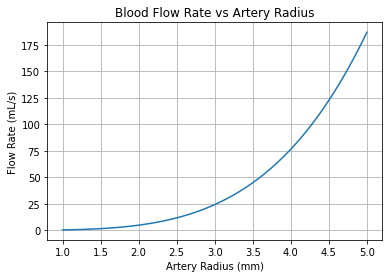

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
eta = 0.0035      # Viscosity of blood (Pa·s)
L = 0.5           # Artery length (m)
delta_P = 1333    # Pressure difference (10 mmHg in Pascals)

# Radius values from 1mm to 5mm
r_mm = np.linspace(1, 5, 100)
r_m = r_mm / 1000  # convert mm to meters

# Poiseuille's Law
Q = (np.pi * delta_P * r_m**4) / (8 * eta * L)  # Flow rate (m³/s)

# Save to CSV
import pandas as pd
df = pd.DataFrame({"radius_mm": r_mm, "flow_rate_ml_s": Q * 1e6})
df.to_csv("../data/flow_data.csv", index=False)

# Plot
plt.plot(r_mm, Q * 1e6)
plt.title("Blood Flow Rate vs Artery Radius")
plt.xlabel("Artery Radius (mm)")
plt.ylabel("Flow Rate (mL/s)")
plt.grid(True)
plt.savefig("../figures/flow_vs_radius.png")
plt.show()

In [2]:
from scipy.optimize import curve_fit

# Define power law model
def power_law(r, a, b):
    return a * r**b

# Fit your Q vs r_m data
popt, pcov = curve_fit(power_law, r_m, Q)
a_fit, b_fit = popt

# Predicted Q values from the fit
Q_fit = power_law(r_m, *popt)

print(f"Fitted exponent (should be close to 4): {b_fit:.4f}")


Fitted exponent (should be close to 4): 4.0000


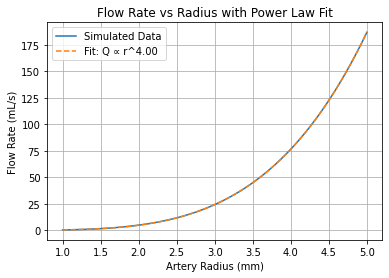

In [3]:
plt.plot(r_mm, Q * 1e6, label="Simulated Data")
plt.plot(r_mm, Q_fit * 1e6, '--', label=f"Fit: Q ∝ r^{b_fit:.2f}")
plt.title("Flow Rate vs Radius with Power Law Fit")
plt.xlabel("Artery Radius (mm)")
plt.ylabel("Flow Rate (mL/s)")
plt.legend()
plt.grid(True)
plt.savefig("../figures/flow_fit_vs_radius.png")
plt.show()

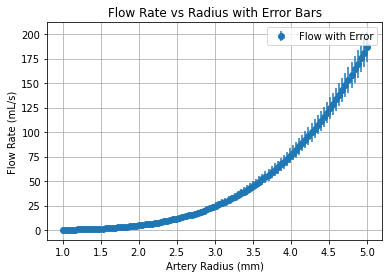

In [4]:
# Assume ±0.1 mm uncertainty in radius
dr_mm = 0.1
dr_m = dr_mm / 1000
dQ = np.abs((4 * Q / r_m) * dr_m)  # From derivative of Q = k*r^4

# Plot with error bars
plt.errorbar(r_mm, Q * 1e6, yerr=dQ * 1e6, fmt='o', label="Flow with Error")
plt.title("Flow Rate vs Radius with Error Bars")
plt.xlabel("Artery Radius (mm)")
plt.ylabel("Flow Rate (mL/s)")
plt.legend()
plt.grid(True)
plt.savefig("../figures/flow_with_error_bars.png")
plt.show()


In [5]:
residuals = Q - Q_fit
chi_squared = np.sum((residuals / dQ)**2)
print(f"Chi-squared value: {chi_squared:.2f}")

Chi-squared value: 0.00
